#Read in data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Classification_data.csv', index_col=0, skipinitialspace = True)
data

,county,GUID,GEOGID,GEOGDESC,Binned Income
0,Co. Carlow,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban,High
1,Co. Carlow,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban,High
2,Co. Carlow,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore,High
3,Co. Carlow,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown,High
4,Co. Carlow,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown,High
...,...,...,...,...,...
3404,Co. Monaghan,2AE196291AC213A3E055000000000001,ED3409_34066,Shanmullagh,Low
3405,Co. Monaghan,2AE196291AC313A3E055000000000001,ED3409_34067,Sheskin,Low
3406,Co. Monaghan,2AE196291AC513A3E055000000000001,ED3409_34068,Tedavnet,Low
3407,Co. Monaghan,2AE196291ACF13A3E055000000000001,ED3409_34069,Tehallan,Low


In [ ]:
x = data.iloc[:, :4]
x

,county,GUID,GEOGID,GEOGDESC
0,Co. Carlow,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban
1,Co. Carlow,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban
2,Co. Carlow,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore
3,Co. Carlow,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown
4,Co. Carlow,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown
...,...,...,...,...
3404,Co. Monaghan,2AE196291AC213A3E055000000000001,ED3409_34066,Shanmullagh
3405,Co. Monaghan,2AE196291AC313A3E055000000000001,ED3409_34067,Sheskin
3406,Co. Monaghan,2AE196291AC513A3E055000000000001,ED3409_34068,Tedavnet
3407,Co. Monaghan,2AE196291ACF13A3E055000000000001,ED3409_34069,Tehallan


In [ ]:
x['county'] = x['county'].str.strip()
x['GEOGDESC'] = x['GEOGDESC'].str.strip()
x['GUID'] = x['GUID'].str.strip()
x['GEOGID'] = x['GEOGID'].str.strip()
x

<ipython-input-66-57395cc6aec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['county'] = x['county'].str.strip()
<ipython-input-66-57395cc6aec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['GEOGDESC'] = x['GEOGDESC'].str.strip()
<ipython-input-66-57395cc6aec1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,county,GUID,GEOGID,GEOGDESC
0,Co. Carlow,2AE19629185813A3E055000000000001,ED3409_01001,Carlow Urban
1,Co. Carlow,2AE196291A5913A3E055000000000001,ED3409_01002,Graigue Urban
2,Co. Carlow,2AE19629186413A3E055000000000001,ED3409_01003,Clonmore
3,Co. Carlow,2AE19629187F13A3E055000000000001,ED3409_01004,Hacketstown
4,Co. Carlow,2AE19629188713A3E055000000000001,ED3409_01005,Haroldstown
...,...,...,...,...
3404,Co. Monaghan,2AE196291AC213A3E055000000000001,ED3409_34066,Shanmullagh
3405,Co. Monaghan,2AE196291AC313A3E055000000000001,ED3409_34067,Sheskin
3406,Co. Monaghan,2AE196291AC513A3E055000000000001,ED3409_34068,Tedavnet
3407,Co. Monaghan,2AE196291ACF13A3E055000000000001,ED3409_34069,Tehallan


In [ ]:
y = data[['Binned Income']]
y

,Binned Income
0,High
1,High
2,High
3,High
4,High
...,...
3404,Low
3405,Low
3406,Low
3407,Low


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

# Install algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.svm import SVC
svm = SVC()
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Encode data

In [ ]:
# define ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
# transform data
X_train = encoder.fit_transform(X_train)
print(X_train)

In [ ]:
y_train = encoder.fit_transform(y_train)
X_val = encoder.fit_transform(X_val)
y_val = encoder.fit_transform(y_val)

# Run models

In [ ]:
models = [dt, rf, knn, svm, bag, xgb, nb, lr]

In [ ]:
model_eval = []
for model in models:
  model = model.fit(X_train, y_train)
  predictions = model.predict(X_val)

  type(predictions)
  accuracy = metrics.accuracy_score(y_val, predictions)
  
  model_eval.append({'Model': model, 'Accuracy': accuracy})

df = pd.DataFrame(model_eval)
df

<ipython-input-169-5c94d2a279cb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(X_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

,Model,Accuracy
0,DecisionTreeClassifier(),0.050296
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.068047
2,KNeighborsClassifier(),0.020710
3,SVC(),0.020710
4,(DecisionTreeClassifier(random_state=136078617...,0.050296
5,"XGBClassifier(base_score=None, booster=None, c...",0.050296
6,GaussianNB(),0.038462
7,LogisticRegression(),0.778107


In [ ]:
model = LogisticRegression()
y_true = y_val
y_pred = lr.predict(X_val)
y_score = lr.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_val, y_score, pos_label=1)

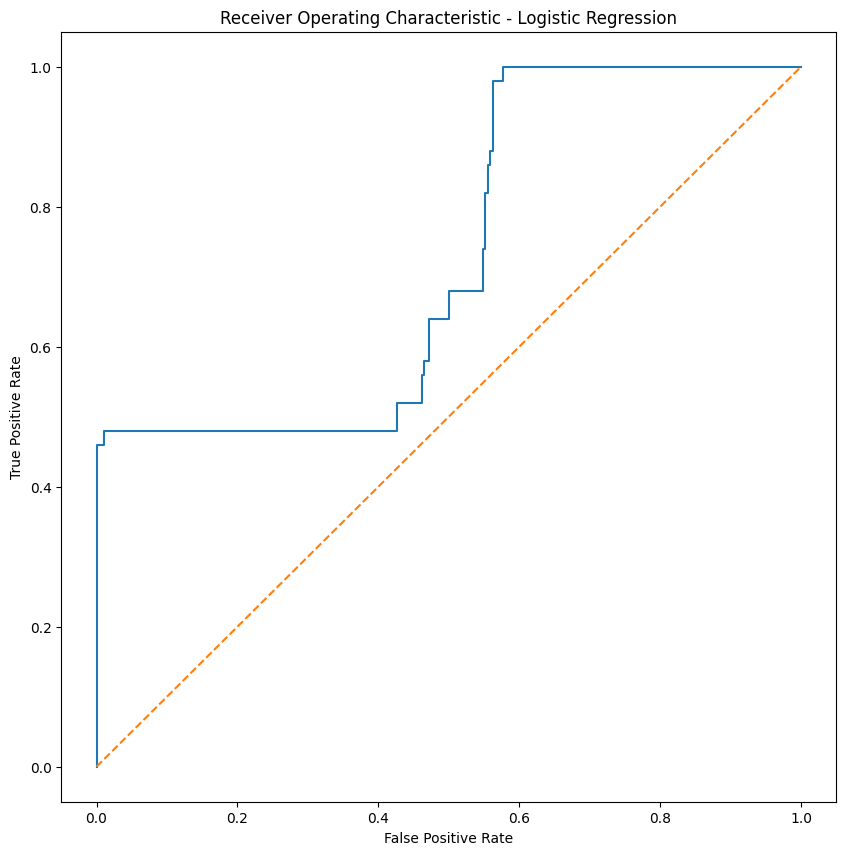

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tune best model

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings

In [ ]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
# print best parameter after tuning
print(grid_result.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_result.best_estimator_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=10, solver='newton-cg')


In [ ]:
model = LogisticRegression(C=10, penalty='l2',solver='newton-cg')


In [ ]:
model = model.fit(X_train, y_train)
predictions = model.predict(X_val)
accuracy = metrics.accuracy_score(y_val, predictions)
print(f'Model: {model}, Accuracy: {accuracy}')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: LogisticRegression(C=10, solver='newton-cg'), Accuracy: 0.2455621301775148


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
